# Part 1: Data Collection

In [104]:
#Importing Libraries
from pandas import Series, DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [105]:
#  Importing the Facebook JSON data into Python.
json_file = 'facebook_midterm.json'

# Load JSON data into a DataFrame
df = pd.read_json(json_file)

In [106]:
df.head()

,sender_name,timestamp_ms,messages,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,Chikwas Mathias,171487000000,Very good ð,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abagha Freedom,17148668161,"Tomorrow is mine, itâs even here",6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chikwas Mathias,1714866761,Really,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abagha Freedom,171487000000,We almost share same date,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chikwas Mathias,171487000000,Thanks bro,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 2: Data Cleaning and Preprocessing 

In [107]:
#Check for number of rows and columns

df.shape

(11476, 12)

In [108]:
df.columns

Index(['sender_name', 'timestamp_ms', 'messages', 'tenure', 'friend_count',
       'friendships_initiated', 'likes', 'likes_received', 'mobile_likes',
       'mobile_likes_received', 'www_likes', 'www_likes_received'],
      dtype='object')

In [109]:
df.head(20)

,sender_name,timestamp_ms,messages,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,Chikwas Mathias,171487000000,Very good ð,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abagha Freedom,17148668161,"Tomorrow is mine, itâs even here",6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chikwas Mathias,1714866761,Really,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abagha Freedom,171487000000,We almost share same date,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chikwas Mathias,171487000000,Thanks bro,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Abagha Freedom,17148585787,"Happy Birthday! ðð bro, long live and pr...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Chikwas Mathias,177266000000,U na chairman,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amole Samson,177265000000,Fine fine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chikwas Mathias,17726433556,How is the work going bro.,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Amole Samson,17726427268,Enjoy bro,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# check the data type of all the columns

df.dtypes

sender_name               object
timestamp_ms               int64
messages                  object
tenure                   float64
friend_count             float64
friendships_initiated    float64
likes                    float64
likes_received           float64
mobile_likes             float64
mobile_likes_received    float64
www_likes                float64
www_likes_received       float64
dtype: object

In [111]:
# Describe numeric variables
df.describe()

,timestamp_ms,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,1.147600e+04,11410.000000,9514.000000,8541.000000,4667.000000,3513.000000,3263.000000,2675.000000,2054.000000,2173.000000
mean,6.784238e+11,255.400876,4.454068,3.622995,27.757874,11.525192,23.035857,7.863178,24.459591,9.814082
std,7.506230e+11,282.145416,3.180879,2.442310,161.382096,60.167969,111.458062,28.729166,142.505778,58.667724
min,1.736767e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.777621e+10,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.654200e+11,171.000000,4.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000
75%,1.651430e+12,378.000000,7.000000,5.000000,14.000000,7.000000,13.000000,6.000000,13.000000,6.000000
max,1.719280e+12,2222.000000,11.000000,11.000000,5937.000000,2618.000000,3272.000000,679.000000,4364.000000,2263.000000


In [112]:
# check for missing values using isna command 

df.isna()

,sender_name,timestamp_ms,messages,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,False,False,False,False,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11471,False,False,False,False,False,False,False,False,False,False,True,False
11472,False,False,False,False,False,False,False,False,True,False,False,False
11473,False,False,False,False,False,False,False,False,False,False,False,False
11474,False,False,False,False,False,False,False,False,False,False,True,False


In [113]:
# summary of all missing values

df.isna().sum()

sender_name                 0
timestamp_ms                0
messages                    0
tenure                     66
friend_count             1962
friendships_initiated    2935
likes                    6809
likes_received           7963
mobile_likes             8213
mobile_likes_received    8801
www_likes                9422
www_likes_received       9303
dtype: int64

In [114]:
# Replace missing values with 0

df2 = df.fillna(value = 0)

In [115]:
df2

,sender_name,timestamp_ms,messages,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,Chikwas Mathias,171487000000,Very good ð,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abagha Freedom,17148668161,"Tomorrow is mine, itâs even here",6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Chikwas Mathias,1714866761,Really,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abagha Freedom,171487000000,We almost share same date,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chikwas Mathias,171487000000,Thanks bro,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11471,Chikwas Mathias,1639220000000,"hi Wiktoria, how are you",275.0,11.0,4.0,64.0,123.0,64.0,5.0,0.0,73.0
11472,Chikwas Mathias,1629970000000,Is the room still available,251.0,11.0,1.0,66.0,33.0,0.0,5.0,66.0,28.0
11473,Chikwas Mathias,168333000000,You can now call each other and see informatio...,148.0,11.0,7.0,67.0,72.0,5.0,71.0,62.0,1.0
11474,Chikwas Mathias,168333000000,Hi,47.0,11.0,7.0,67.0,75.0,67.0,17.0,0.0,58.0


In [116]:
# check again for missing values using isna command 

df2.isna()

,sender_name,timestamp_ms,messages,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11471,False,False,False,False,False,False,False,False,False,False,False,False
11472,False,False,False,False,False,False,False,False,False,False,False,False
11473,False,False,False,False,False,False,False,False,False,False,False,False
11474,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
# summary of all missing values

df2.isna().sum()

sender_name              0
timestamp_ms             0
messages                 0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

# Part 3: Exploratory Data Analysis and Visualization 

In [117]:
# Summary statistics
summary_stats = df2[['tenure', 'friend_count', 'friendships_initiated',
                     'likes', 'likes_received', 'mobile_likes',
                     'mobile_likes_received', 'www_likes', 'www_likes_received']].describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
             tenure  friend_count  friendships_initiated         likes  \
count  11476.000000  11476.000000           11476.000000  11476.000000   
mean     253.932032      3.692576               2.696410     11.288428   
std      281.995018      3.346658               2.633988    103.807976   
min        0.000000      0.000000               0.000000      0.000000   
25%       37.000000      1.000000               0.000000      0.000000   
50%      168.000000      3.000000               2.000000      0.000000   
75%      377.000000      6.000000               4.000000      2.000000   
max     2222.000000     11.000000              11.000000   5937.000000   

       likes_received  mobile_likes  mobile_likes_received     www_likes  \
count    11476.000000  11476.000000           11476.000000  11476.000000   
mean         3.528059      6.549843               1.832869      4.377832   
std         33.707541     60.327853              14.261386     61.001818   
min      

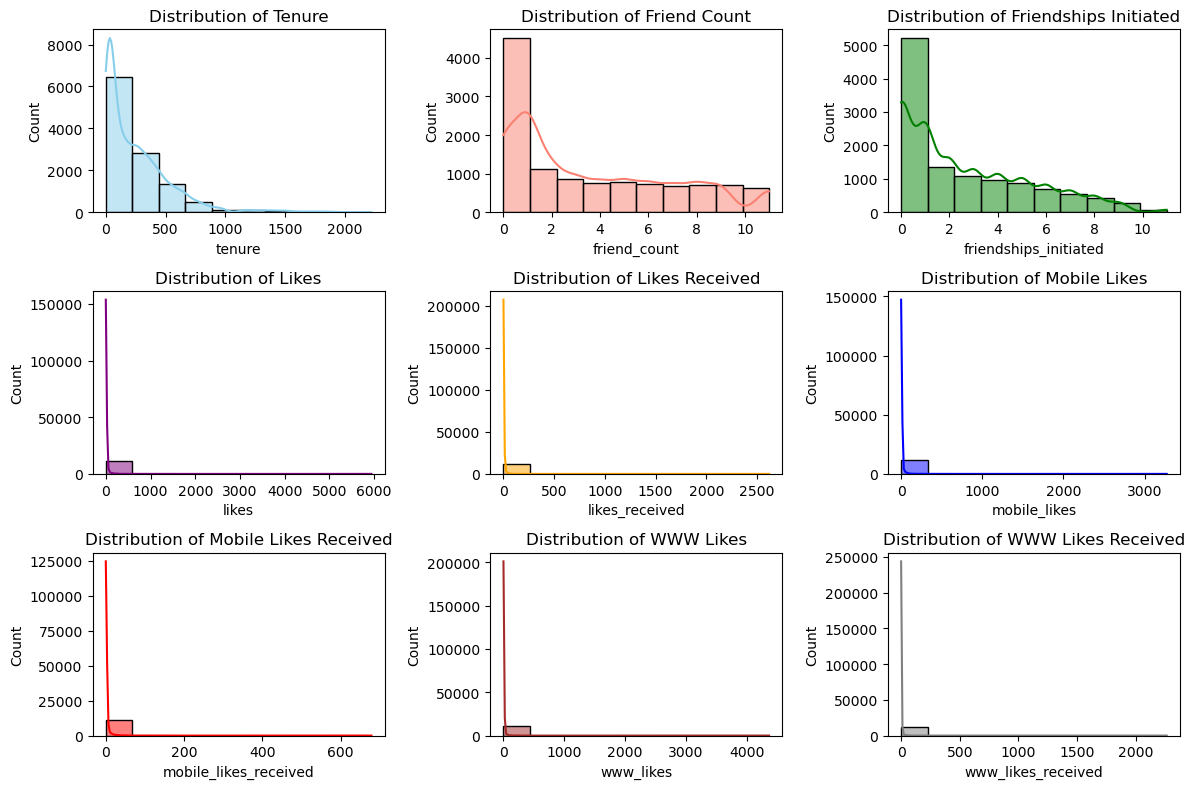

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
sns.histplot(df2['tenure'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Tenure')

plt.subplot(3, 3, 2)
sns.histplot(df2['friend_count'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Friend Count')

plt.subplot(3, 3, 3)
sns.histplot(df2['friendships_initiated'], bins=10, kde=True, color='green')
plt.title('Distribution of Friendships Initiated')

plt.subplot(3, 3, 4)
sns.histplot(df2['likes'], bins=10, kde=True, color='purple')
plt.title('Distribution of Likes')

plt.subplot(3, 3, 5)
sns.histplot(df2['likes_received'], bins=10, kde=True, color='orange')
plt.title('Distribution of Likes Received')

plt.subplot(3, 3, 6)
sns.histplot(df2['mobile_likes'], bins=10, kde=True, color='blue')
plt.title('Distribution of Mobile Likes')

plt.subplot(3, 3, 7)
sns.histplot(df2['mobile_likes_received'], bins=10, kde=True, color='red')
plt.title('Distribution of Mobile Likes Received')

plt.subplot(3, 3, 8)
sns.histplot(df2['www_likes'], bins=10, kde=True, color='brown')
plt.title('Distribution of WWW Likes')

plt.subplot(3, 3, 9)
sns.histplot(df2['www_likes_received'], bins=10, kde=True, color='gray')
plt.title('Distribution of WWW Likes Received')

plt.tight_layout()
plt.show()

C:\Users\chikw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\chikw\AppData\Local\Temp\ipykernel_99308\3221575303.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.95])


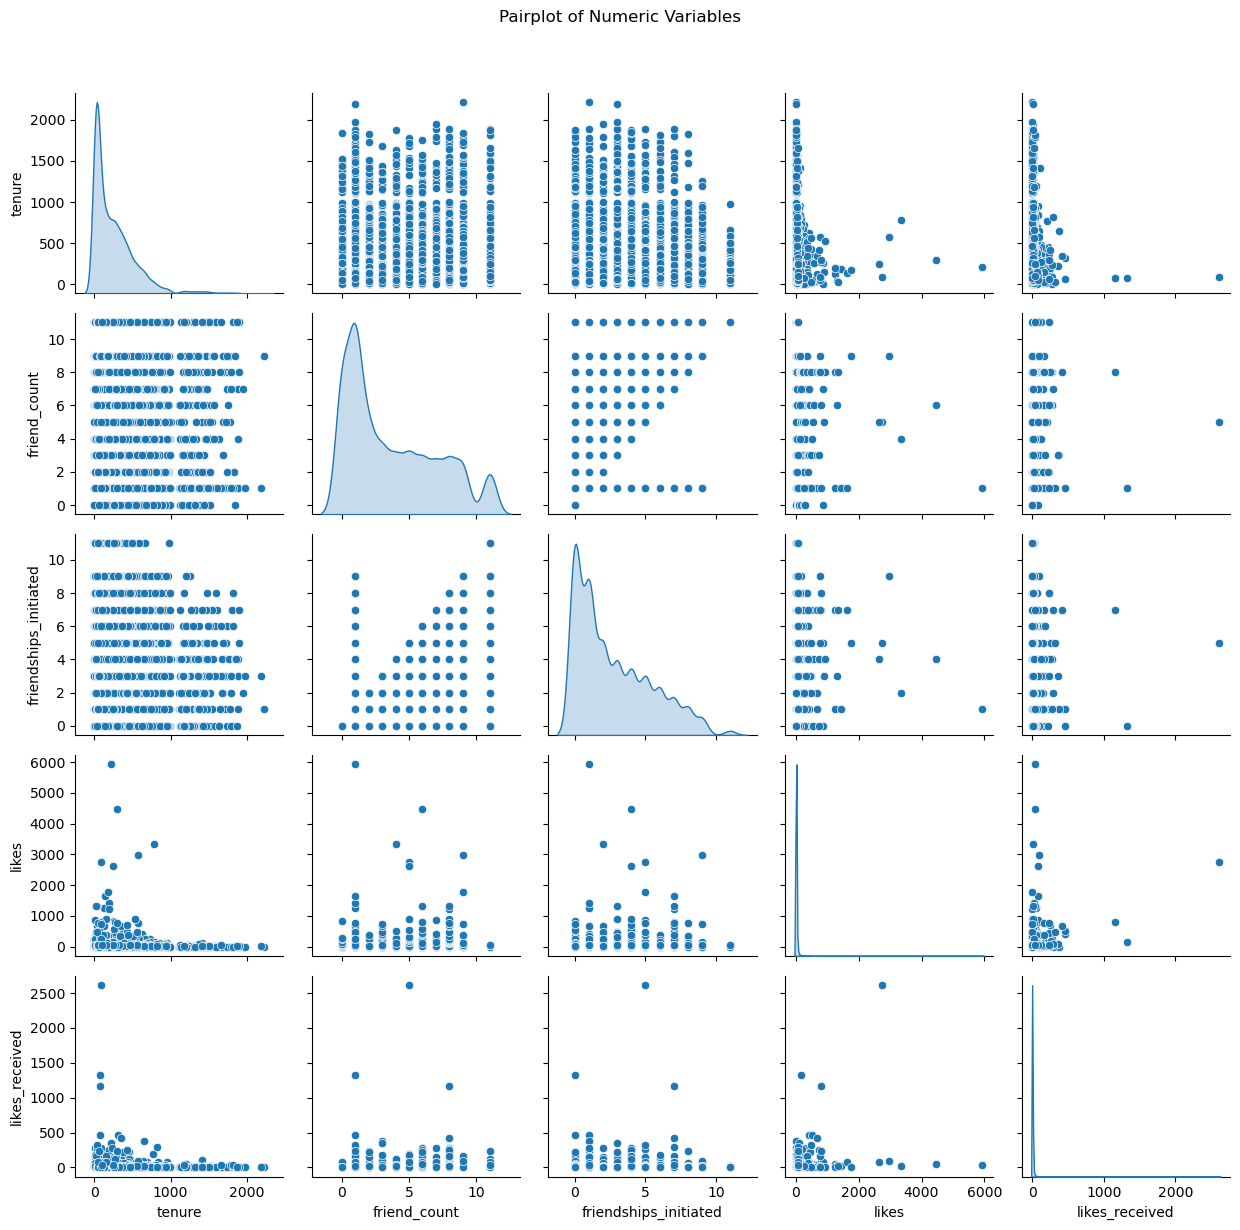

In [119]:
# Pairplot
sns.pairplot(df2[['tenure', 'friend_count', 'friendships_initiated', 'likes', 'likes_received']], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

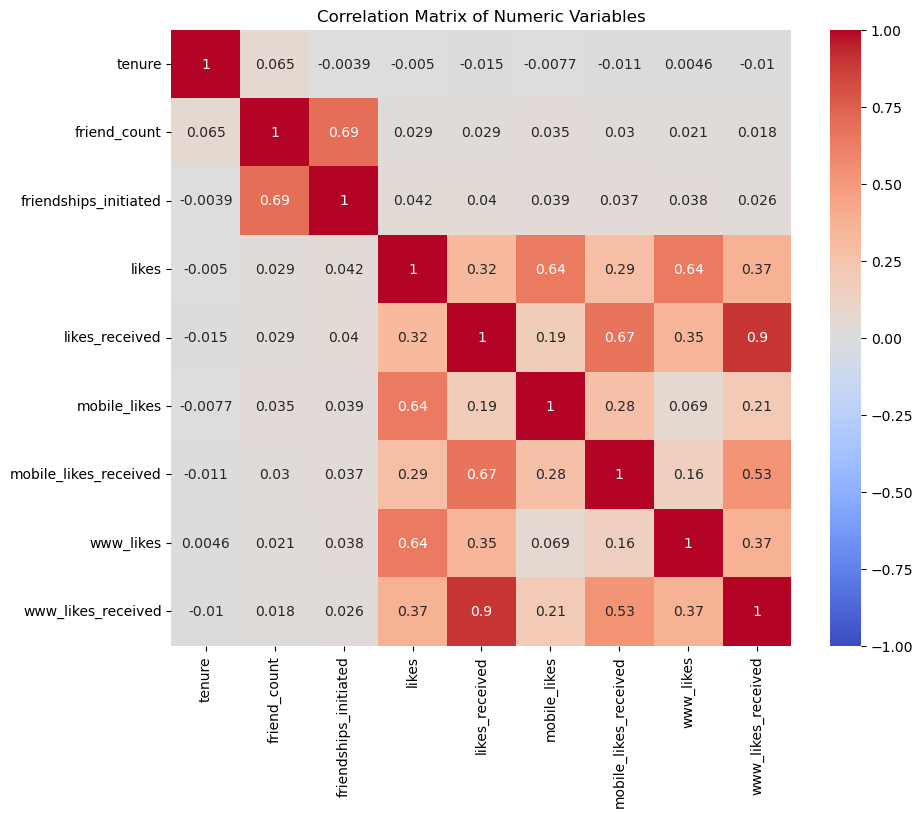

In [120]:
# Correlation matrix
correlation_matrix = df2[['tenure', 'friend_count', 'friendships_initiated',
                          'likes', 'likes_received', 'mobile_likes',
                          'mobile_likes_received', 'www_likes', 'www_likes_received']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


C:\Users\chikw\AppData\Local\Temp\ipykernel_99308\97530081.py:18: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
C:\Users\chikw\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


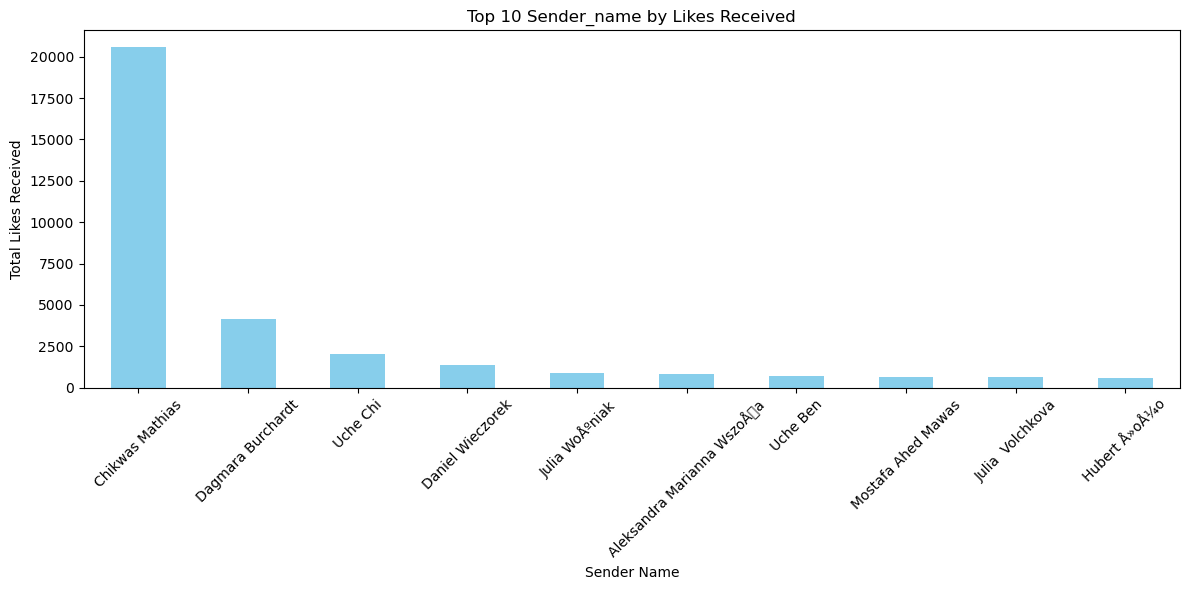

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your dataset
# Group by sender_name and aggregate likes_received
sender_likes = df2.groupby('sender_name')['likes_received'].sum()

# Sort values in descending order and select top 10
top_10_senders = sender_likes.sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_10_senders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sender_name by Likes Received')
plt.xlabel('Sender Name')
plt.ylabel('Total Likes Received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\chikw\AppData\Local\Temp\ipykernel_99308\3032563859.py:22: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
C:\Users\chikw\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


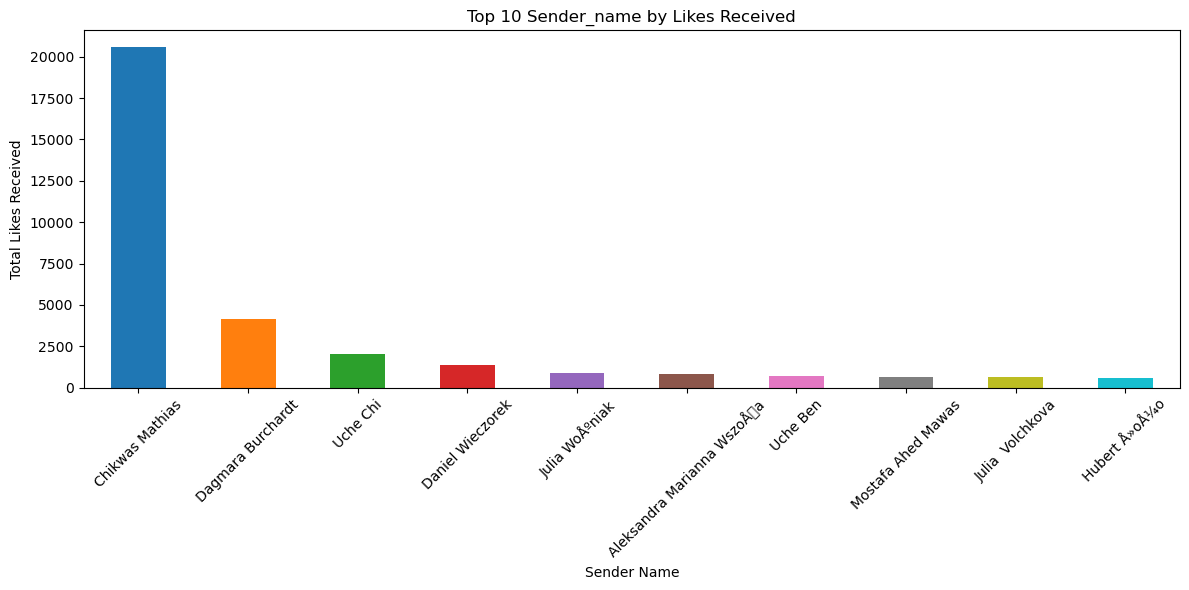

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df2 is your dataset
# Group by sender_name and aggregate likes_received
sender_likes = df2.groupby('sender_name')['likes_received'].sum()

# Sort values in descending order and select top 10
top_10_senders = sender_likes.sort_values(ascending=False).head(10)

# Generate a color map
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_senders)))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_10_senders.plot(kind='bar', color=colors)
plt.title('Top 10 Sender_name by Likes Received')
plt.xlabel('Sender Name')
plt.ylabel('Total Likes Received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

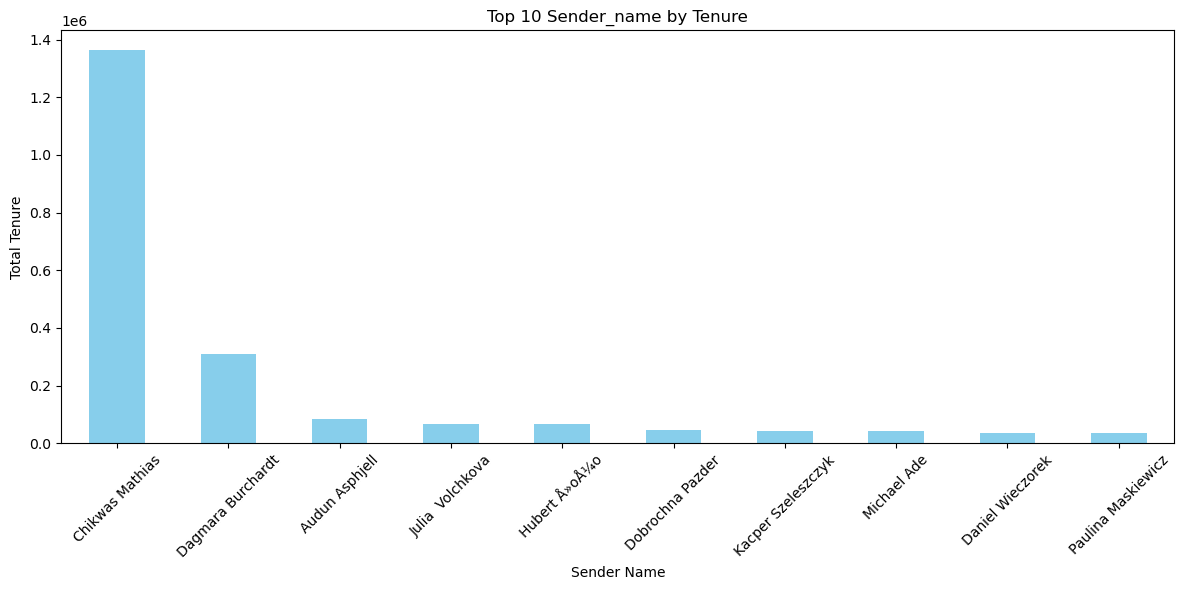

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 is your dataset
# Group by sender_name and aggregate tenure (assuming it's already in days or months)
sender_tenure = df2.groupby('sender_name')['tenure'].sum()

# Sort values in descending order and select top 10
top_10_tenures = sender_tenure.sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_10_tenures.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sender_name by Tenure')
plt.xlabel('Sender Name')
plt.ylabel('Total Tenure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


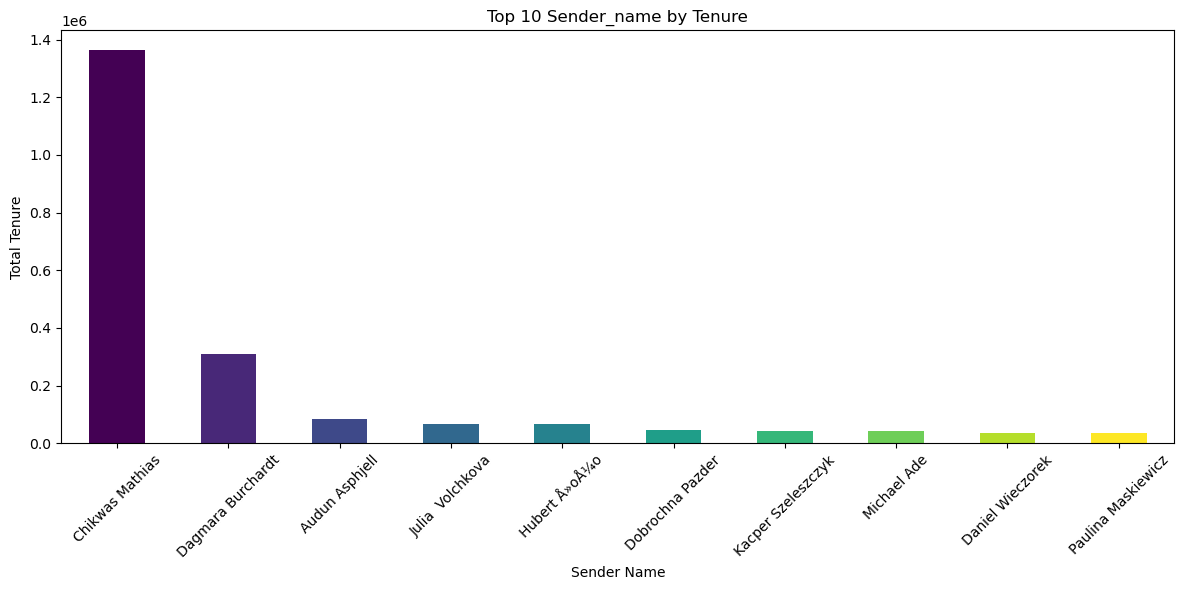

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df2 is your dataset
# Group by sender_name and aggregate tenure (assuming it's already in days or months)
sender_tenure = df2.groupby('sender_name')['tenure'].sum()

# Sort values in descending order and select top 10
top_10_tenures = sender_tenure.sort_values(ascending=False).head(10)

# Generate a color map
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_tenures)))

# Plotting the bar chart
plt.figure(figsize=(12, 6))
top_10_tenures.plot(kind='bar', color=colors)
plt.title('Top 10 Sender_name by Tenure')
plt.xlabel('Sender Name')
plt.ylabel('Total Tenure')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 4: Sentiment Analysis 

In [123]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [124]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [125]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, state_union
from nltk.tokenize import word_tokenize
import string
import re

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('state_union')

# using df2 as DataFrame and 'messages' is the column containing text data

# Load words from State Union corpus and convert to set for fast lookup
state_union_words = set([w.lower() for w in state_union.words() if w.isalpha()])

# Function for text preprocessing with additional vocabulary
def preprocess_text(text, additional_vocab=None):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and single-character tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
    
    # Filter tokens using additional vocabulary if provided
    if additional_vocab:
        tokens = [token for token in tokens if token in additional_vocab]
    
    return tokens

# using df2['messages'] is your messages column
messages = df2['messages']

# Iterate over each message, preprocess, and print tokens
for idx, message in enumerate(messages):
    preprocessed_tokens = preprocess_text(message, additional_vocab=state_union_words)
    print(preprocessed_tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!


['good']
['tomorrow', 'mine', 'even']
['really']
['almost', 'share', 'date']
['thanks']
['happy', 'birthday', 'long', 'live', 'prosperity']
['na', 'chairman']
['fine', 'fine']
['work', 'going']
['enjoy']
['work']
['still']
[]
['like']
['guy']
[]
[]
[]
['christmas']
['thanks']
['christmas']
[]
['sent']
['thanks']
['god']
[]
['good', 'morning']
['christmas']
['tried', 'explain', 'food']
[]
['back', 'two', 'months']
[]
['went', 'poland', 'renew', 'polish']
['hardly', 'renew', 'norway', 'migration', 'policy', 'must', 'get', 'job', 'based', 'study', 'university']
['right', 'finland']
['maybe', 'back', 'norway']
['went', 'poland', 'months']
['live']
[]
['still', 'live']
['available', 'today']
['good', 'morning']
['wonder', 'interested', 'simple', 'job']
[]
[]
[]
['fine', 'ask']
['friends', 'know', 'available', 'tomorrow', 'hours', 'work']
['sent']
['thank', 'happy', 'new', 'year', 'good', 'de']
['christmas', 'prosperous', 'new', 'year']
['help', 'little', 'tomorrow', 'would', 'great', 'per',

In [126]:
sentiment_analyzer = SentimentIntensityAnalyzer() 

In [127]:
sentiment_analyzer.polarity_scores('that\'s sweet')

{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.4588}

In [94]:
sentiment_scores = df2['messages'].apply(lambda message: sentiment_analyzer.polarity_scores(message))

# Print each message with its sentiment scores
for message, score in zip(df2['messages'], sentiment_scores):
    print(f"Message: {message}")
    print(f"Sentiment Score: {score}")
    print()

Message: Very good ð
Sentiment Score: {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4927}

Message: Tomorrow is mine, itâs even here
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: Really
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: We almost share same date
Sentiment Score: {'neg': 0.0, 'neu': 0.677, 'pos': 0.323, 'compound': 0.228}

Message: Thanks bro
Sentiment Score: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}

Message: Happy Birthday! ðð bro, long live and prosperity
Sentiment Score: {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.6114}

Message: U na chairman
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: Fine fine
Sentiment Score: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3818}

Message: How is the work going bro.
Sentiment Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Message: Enjoy bro
Sentiment Score: {'neg

In [95]:
import pandas as pd
import nltk
from nltk.corpus import stopwords, state_union
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('state_union')

# Load your DataFrame df2
# Assuming df2 is your DataFrame and 'messages' is the column containing text data
messages = df2['messages']

# Load words from State Union corpus and convert to set for fast lookup
state_union_words = set([w.lower() for w in state_union.words() if w.isalpha()])

# Function for text preprocessing with additional vocabulary
def preprocess_text(text, additional_vocab=None):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation and special characters using regex
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and single-character tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 1]
    
    # Filter tokens using additional vocabulary if provided
    if additional_vocab:
        tokens = [token for token in tokens if token in additional_vocab]
    
    return tokens

# Apply preprocessing to each message
processed_text = messages.apply(lambda x: preprocess_text(x, additional_vocab=state_union_words))

# Convert processed text into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(processed_text.astype(str))

# Assuming df2 contains a column 'sentiment_label'
y = df2['messages'].astype('category').cat.codes

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\chikw\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [128]:
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         1
          73       0.00      0.00      0.00         1
          79       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         1
          87       0.00    

C:\Users\chikw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chikw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chikw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chikw\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined from the previous steps
# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.14
Precision: 0.06
Recall: 0.14
F1-score: 0.08


C:\Users\chikw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chikw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
pip install vaderSentiment

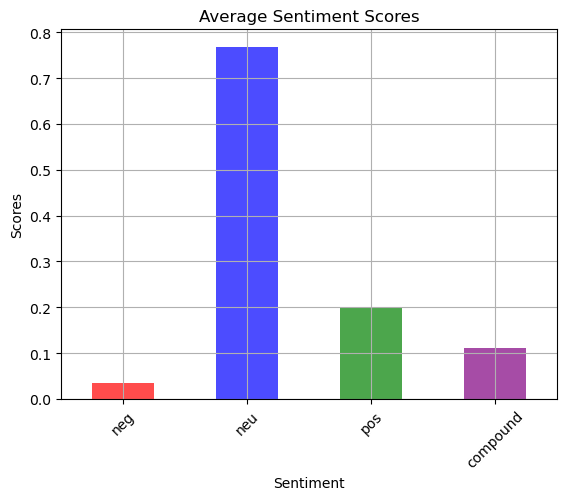

In [129]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Apply the polarity_scores function to each message and store the results
df2['sentiment_scores'] = df2['messages'].apply(lambda message: sentiment_analyzer.polarity_scores(message))

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.DataFrame(df2['sentiment_scores'].tolist())

# Plotting the sentiment scores
sentiment_means = sentiment_df[['neg', 'neu', 'pos', 'compound']].mean()
sentiment_means.plot(kind='bar', color=['red', 'blue', 'green', 'purple'], alpha=0.7)

# Customize the plot
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

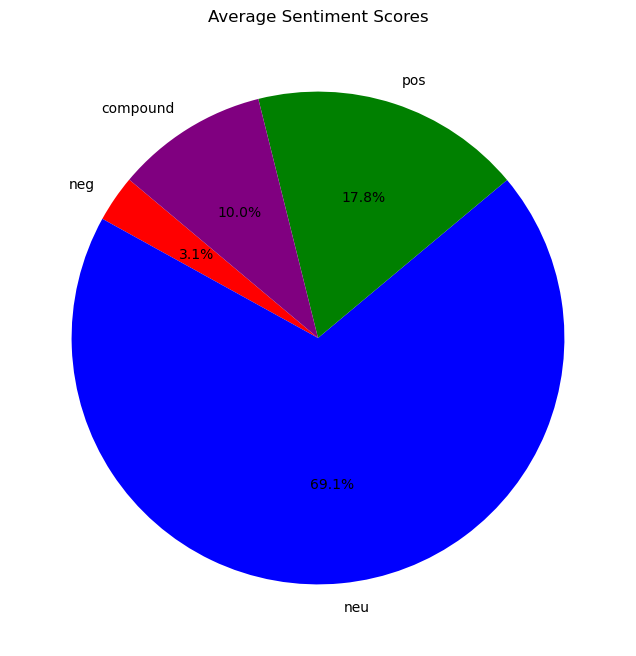

In [103]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Apply the polarity_scores function to each message and store the results
df2['sentiment_scores'] = df2['messages'].apply(lambda message: sentiment_analyzer.polarity_scores(message))

# Convert the sentiment scores to a DataFrame
sentiment_df = pd.DataFrame(df2['sentiment_scores'].tolist())

# Calculate the average sentiment scores
sentiment_means = sentiment_df[['neg', 'neu', 'pos', 'compound']].mean()

# Plotting the sentiment scores as a pie chart
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(8, 8))
plt.pie(sentiment_means, labels=sentiment_means.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Sentiment Scores')

# Show the plot
plt.show()


# Part 5: Metrics Development 

### Metrics for Measuring Impact, Awareness, and Sentiment
#### Impact Metrics:

Likes and Likes Received: Measure engagement with your posts and the reach of your content. Higher likes indicate content resonance.
Mobile vs. Web Likes: Compare likes received via mobile and web platforms to understand user behavior.
Friend Count and Friendships Initiated: Track growth in your network and interactions initiated to gauge influence expansion.
Awareness Metrics:

Tenure: Measure the duration of your presence on Facebook. Long tenure might indicate established presence and potentially higher awareness.
Likes vs. Likes Received: Calculate the ratio of likes received to likes given to assess how engaging your content is perceived by others.
Mobile vs. Web Likes Received: Compare where most likes are received to understand platform-specific audience engagement.
Sentiment Metrics:

Sentiment Analysis of Messages: Use tools like VADER to analyze sentiment in your messages. This can gauge overall sentiment trends over time.
Likes and Sentiment Correlation: Explore if there’s a correlation between sentiment in messages and likes received. Positive sentiment might correlate with higher engagement.

### Designing Social Media Scorecards or Dashboards

#### Components of the Scorecard/Dashboard:
Overview Section:

Total Likes, Likes Received: Summarize overall engagement metrics.
Friend Count and Tenure: Display growth and duration metrics.
Engagement Section:

Likes Breakdown (Mobile vs. Web): Visualize where engagement is higher.
Likes vs. Likes Received Ratio: Show how engaging your content is relative to your interactions.
Impact Section:

Friendships Initiated: Track new connections made.
Likes and Sentiment Trends: Graph trends in sentiment and engagement over time.
Sentiment Section:

Sentiment Analysis: Display sentiment scores or trends from messages.
Correlation Analysis: Highlight any correlations found between sentiment and engagement metrics.

### Justification of Choices
Use of Metrics: Chosen metrics align with industry standards focusing on engagement (likes), reach (friend count, friendships initiated), and sentiment analysis for understanding audience sentiment towards content.

Visualization Techniques: Bar charts for sentiment and engagement metrics, line graphs for trend analysis, and ratio calculations provide clear insights into performance.

Benchmarking: Compare metrics against past performance or industry averages to gauge effectiveness and identify areas for improvement.

# Part 6: Ethical Considerations:

### Privacy Concerns
The major ethical concern in social data mining is the privacy of individuals. Social media platforms like Facebook host vast 
amounts of personal information, ranging from demographic details to personal interests and daily activities. When this data is 
mined without explicit consent or properly explanations, it infringes on users privacy rights. Even when users agree to terms of
service, they often do not fully comprehend the extent to which their data can be analyzed and used. This lack of informed 
consent raises ethical issues about the transparency and honesty of data collection practices.

### Potential Biases
Potential for biases in the data and its interpretation. Social media users are not a perfectly representative sample of the 
broader population, as factors such as age, socioeconomic status, and geographic location influence who uses these platforms 
and how they use them. Consequently, analyses based on social media data can perpetuate and even amplify existing biases. 
Furthermore, algorithms used in data mining may reflect the biases of their developers, leading to skewed results that can 
unfairly target or exclude certain groups.

### Responsibility of Data Analysts
Data analysts and researchers have a profound ethical responsibility to handle sensitive information with care. They must ensure
that their work does not harm individuals or groups, intentionally or unintentionally. This includes implementing robust data 
anonymization techniques to protect user identities (including name, age, economic status, medical conditions etc.) and being 
mindful of the potential real-world impacts of their findings. Analysts should also be transparent about their methodologies and
the limitations of their data to avoid misleading conclusions.

### Conclusion
In conclusion, while social data mining offers valuable insights, it must be conducted with a strong ethical framework that 
prioritizes privacy, recognizes and mitigates biases, and emphasizes the responsibility of data analysts. By adhering to these 
principles, the practice can contribute positively to our understanding of social behaviors without compromising individual 
rights and societal fairness. Otherwise it could be disastrous.